<div style="border: 2px solid black; padding: 10px;">
    <h1><u>PROJET : Techniques d’apprentissage artificiel</u></h1>
    <h3>Réalisé par ANTON NELCON Steve & CORTADA Lucas</h3>
    <p><i>Master 1 Informatique et Big DATA - Université Paris 8</i></p>
</div>


# <u>→SUJET : Analyse et prédiction des taux de natalité mondiaux par apprentissage automatique</u>

<div style="border: 2px solid #333; border-radius: 10px; padding: 15px;">
    <h2><u>→Problématique :</u></h2>
    <p>
<p style="font-size:20px;">
Comment modéliser et prédire l'évolution des taux de natalité à l'échelle mondiale en utilisant 
des techniques d'apprentissage automatique, et peut-on identifier des profils de pays similaires 
selon leurs tendances démographiques ?
</p>

    
</div>
<div style="border: 2px solid #1335f5ff; padding: 10px; background-color: #392fffff;">
    <h3>Objectifs</h3>
    <ol>
        <li>Analyser l'évolution historique des taux de natalité (1960-2020)</li>
        <li>Comparer différents modèles de régression pour prédire les tendances</li>
        <li>Segmenter les pays en groupes selon leurs profils démographiques</li>
        <li>Générer des prédictions pour la décennie 2021-2030</li>
    </ol>
</div>


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b>0. Prétraitement des données</b></h3>
</div>




<span style="background-color: #392fffff">→ Importation du Jeu de données</span>


In [25]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=np.inf)

# Importer le jeu de données 
data = pd.read_csv('../data/raw/fertility_rate.csv', sep=',')

<span style="background-color: #392fffff">→ Collecter les informations du Dataset</span>


In [26]:

# ===============================
# Résumé général du dataset
# ===============================
resume_df = pd.DataFrame({
    "Catégorie": ["Nombre de lignes", "Nombre de colonnes"],
    "Valeur": [data.shape[0], data.shape[1]]
})
print("\nRésumé général du dataset :")
display(resume_df)

# ===============================
# Liste des colonnes disponibles
# ===============================
colonnes_df = pd.DataFrame({
    "Indice": range(1, len(data.columns) + 1),
    "Nom de la colonne": data.columns
})
print("\nColonnes disponibles :")
display(colonnes_df)

# ===============================
# Aperçu des premières lignes
# ===============================
print("\nAperçu des 5 premières lignes du dataset :")
display(data.head(5))

# ===============================
# Vérification des valeurs manquantes
# ===============================
missing_df = pd.DataFrame({
    "Colonne": data.columns,
    "Valeurs manquantes": data.isnull().sum()
})
missing_df["Statut"] = missing_df["Valeurs manquantes"].apply(
    lambda x: "Aucune" if x == 0 else f"{x} manquante(s)"
)
print("\nVérification des valeurs manquantes :")
display(missing_df)



Résumé général du dataset :


,Catégorie,Valeur
0,Nombre de lignes,187
1,Nombre de colonnes,62



Colonnes disponibles :


,Indice,Nom de la colonne
0,1,Country
1,2,1960
2,3,1961
3,4,1962
4,5,1963
...,...,...
57,58,2016
58,59,2017
59,60,2018
60,61,2019



Aperçu des 5 premières lignes du dataset :


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37



Vérification des valeurs manquantes :


,Colonne,Valeurs manquantes,Statut
Country,Country,0,Aucune
1960,1960,0,Aucune
1961,1961,0,Aucune
1962,1962,0,Aucune
1963,1963,0,Aucune
...,...,...,...
2016,2016,0,Aucune
2017,2017,0,Aucune
2018,2018,0,Aucune
2019,2019,0,Aucune


<span style="background-color: #392fffff">→Aperçu des premières colonnes et lignes </span>


In [ ]:
# ===============================
# Liste des colonnes disponibles
# ===============================
colonnes_df = pd.DataFrame({
    "Indice": range(1, len(data.columns) + 1),
    "Nom de la colonne": data.columns
})

print("\nListe des colonnes disponibles :")
display(colonnes_df)


# ===============================
# Aperçu des 10 premières lignes
# ===============================
apercu_df = data.head(10).reset_index(drop=True)

print("\nAperçu des 10 premières lignes du dataset :")
display(apercu_df)




Liste des colonnes disponibles :


,Indice,Nom de la colonne
0,1,Country
1,2,1960
2,3,1961
3,4,1962
4,5,1963
...,...,...
57,58,2016
58,59,2017
59,60,2018
60,61,2019



Aperçu des 10 premières lignes du dataset :


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37
5,Antigua and Barbuda,4.43,4.39,4.34,4.30,4.25,4.19,4.13,4.04,3.94,...,1.99,1.99,2.00,2.00,2.00,2.00,2.00,1.99,1.99,1.98
6,Arab World,6.98,7.00,7.02,7.04,7.05,7.05,7.04,7.03,7.00,...,3.46,3.45,3.43,3.40,3.37,3.32,3.28,3.23,3.19,3.15
7,Argentina,3.11,3.10,3.09,3.08,3.07,3.06,3.05,3.05,3.05,...,2.34,2.33,2.32,2.31,2.30,2.29,2.28,2.26,2.25,2.23
8,Armenia,4.79,4.67,4.52,4.35,4.15,3.95,3.76,3.58,3.43,...,1.72,1.73,1.73,1.73,1.74,1.74,1.75,1.76,1.76,1.76
9,Aruba,4.82,4.66,4.47,4.27,4.06,3.84,3.63,3.42,3.23,...,1.78,1.80,1.81,1.83,1.85,1.87,1.89,1.90,1.90,1.90


<span style="background-color: #392fffff">→ Afficher uniquement les données de la France </span>


In [36]:


# ===============================
# Affichage de la 61ème ligne
# ===============================
ligne_61_df = pd.DataFrame(data.iloc[61]).reset_index()
ligne_61_df.columns = ["Colonne", "Valeur"]

print("\n61ème ligne du dataset (index 61) :")
display(ligne_61_df)



61ème ligne du dataset (index 61) :


,Colonne,Valeur
0,Country,France
1,1960,2.85
2,1961,2.87
3,1962,2.89
4,1963,2.89
...,...,...
57,2016,1.92
58,2017,1.89
59,2018,1.87
60,2019,1.86


<span style="background-color: #392fffff">→ Structure de la  Dataset</span>


In [41]:
import pandas as pd

# ===============================
# Charger le fichier CSV correctement
# ===============================
data = pd.read_csv('../data/raw/fertility_rate.csv', sep=',')

print("\n" + "="*70)
print(" STRUCTURE DU DATASET ".center(70, "="))
print("="*70 + "\n")

# Forme du dataset
resume_df = pd.DataFrame({
    "Catégorie": ["Nombre de pays", "Nombre d'années"],
    "Valeur": [data.shape[0], data.shape[1]]
})
print("Résumé général du dataset :")
display(resume_df)

# Affichage des colonnes (10 premières + info sur les autres)
n_cols = min(10, len(data.columns))

colonnes_df = pd.DataFrame({
    "Indice": range(1, n_cols + 1),
    "Nom de la colonne": data.columns[:n_cols],
    "Type": ["PAYS" if not col.isdigit() else "ANNÉE" for col in data.columns[:n_cols]]
})

print("\nColonnes trouvées (échantillon) :")
display(colonnes_df)

if len(data.columns) > 10:
    print(f"... et {len(data.columns) - 10} colonnes supplémentaires")


# Colonnes identifiées automatiquement
id_col = data.columns[0]  # Première colonne = pays
year_cols = [c for c in data.columns if c.isdigit()]

config_df = pd.DataFrame({
    "Paramètre": ["Colonne identifiant", "Colonnes années", "Nombre de colonnes années", "Année début", "Année fin"],
    "Valeur": [id_col, year_cols, len(year_cols), year_cols[0], year_cols[-1]]
})
print("\n Configuration détectée :")
display(config_df)

# ===============================
# Transformation en format LONG
# ===============================
df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

print("\nAprès transformation LONG :")
long_info_df = pd.DataFrame({
    "Catégorie": ["Forme (lignes × colonnes)", "Colonnes", "Échantillon (10 premières lignes)"],
    "Valeur": [df_long.shape, df_long.columns.tolist(), "voir tableau ci-dessous"]
})
display(long_info_df)

print("\nPremiers pays-années :")
display(df_long.head(10))

print("\n Prêt pour l'analyse !")



======================== STRUCTURE DU DATASET ========================

Résumé général du dataset :


,Catégorie,Valeur
0,Nombre de pays,187
1,Nombre d'années,62



Colonnes trouvées (échantillon) :


,Indice,Nom de la colonne,Type
0,1,Country,PAYS
1,2,1960,ANNÉE
2,3,1961,ANNÉE
3,4,1962,ANNÉE
4,5,1963,ANNÉE
5,6,1964,ANNÉE
6,7,1965,ANNÉE
7,8,1966,ANNÉE
8,9,1967,ANNÉE
9,10,1968,ANNÉE


... et 52 colonnes supplémentaires

 Configuration détectée :


,Paramètre,Valeur
0,Colonne identifiant,Country
1,Colonnes années,"[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196..."
2,Nombre de colonnes années,61
3,Année début,1960
4,Année fin,2020



Après transformation LONG :


,Catégorie,Valeur
0,Forme (lignes × colonnes),"(11407, 3)"
1,Colonnes,"[Country, Year, FertilityRate]"
2,Échantillon (10 premières lignes),voir tableau ci-dessous



Premiers pays-années :


,Country,Year,FertilityRate
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49
3,Algeria,1960,7.52
4,Angola,1960,6.71
5,Antigua and Barbuda,1960,4.43
6,Arab World,1960,6.98
7,Argentina,1960,3.11
8,Armenia,1960,4.79
9,Aruba,1960,4.82



 Prêt pour l'analyse !


<span style="background-color: #392fffff">→ Tableau : Filtrage de tout les pays (1960-2020)</span>


In [56]:
# ============================================================
#  Filtrer tous les pays (1960–2020)
# ============================================================
df_all = df_long[df_long["Year"].between(1960, 2020)].reset_index(drop=True)

# ============================================================
#  Tableau : Fertilité par pays (1960–2020)
# ============================================================
print("\n Évolution du taux de fertilité par pays (1960–2020)")

# Création du DataFrame pour affichage (même colonnes que l'affichage original)
df_tableau = df_all[["Country", "Year", "FertilityRate"]].copy()
df_tableau.rename(columns={
    "Country": "Pays",
    "Year": "Année",
    "FertilityRate": "Fertilité "
}, inplace=True)

# Affichage avec display
display(df_tableau)



 Évolution du taux de fertilité par pays (1960–2020)


,Pays,Année,Fertilité
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49
3,Algeria,1960,7.52
4,Angola,1960,6.71
...,...,...,...
11402,Venezuela,2020,2.23
11403,Vietnam,2020,2.05
11404,Yemen,2020,3.61
11405,Zambia,2020,4.50


<span style="background-color: #392fffff">→ Tabeau : Filtrage pour la France uniquement</span>


In [61]:
# ============================================================
#  Filtrer uniquement la France (1960–2020)
# ============================================================
df_france = df_long[(df_long["Country"] == "France") &
                    (df_long["Year"].between(1960, 2020))].reset_index(drop=True)

# ============================================================
#  Tableau : Fertilité en France (1960–2020)
# ============================================================
print("\n Évolution du taux de fertilité  (nombre d'enfants par femmes) en France (1960–2020)")

# Création du DataFrame pour affichage (même colonnes que l'affichage original)
df_tableau_fr = df_france[["Country", "Year", "FertilityRate"]].copy()
df_tableau_fr.rename(columns={
    "Country": "Pays",
    "Year": "Année",
    "FertilityRate": "Fertilité "
}, inplace=True)

# Affichage avec display
display(df_tableau_fr)




 Évolution du taux de fertilité  (nombre d'enfants par femmes) en France (1960–2020)


,Pays,Année,Fertilité
0,France,1960,2.85
1,France,1961,2.87
2,France,1962,2.89
3,France,1963,2.89
4,France,1964,2.87
...,...,...,...
56,France,2016,1.92
57,France,2017,1.89
58,France,2018,1.87
59,France,2019,1.86


<span style="background-color: #392fffff">→ Evolution du taux de fertilité mondiale</span>


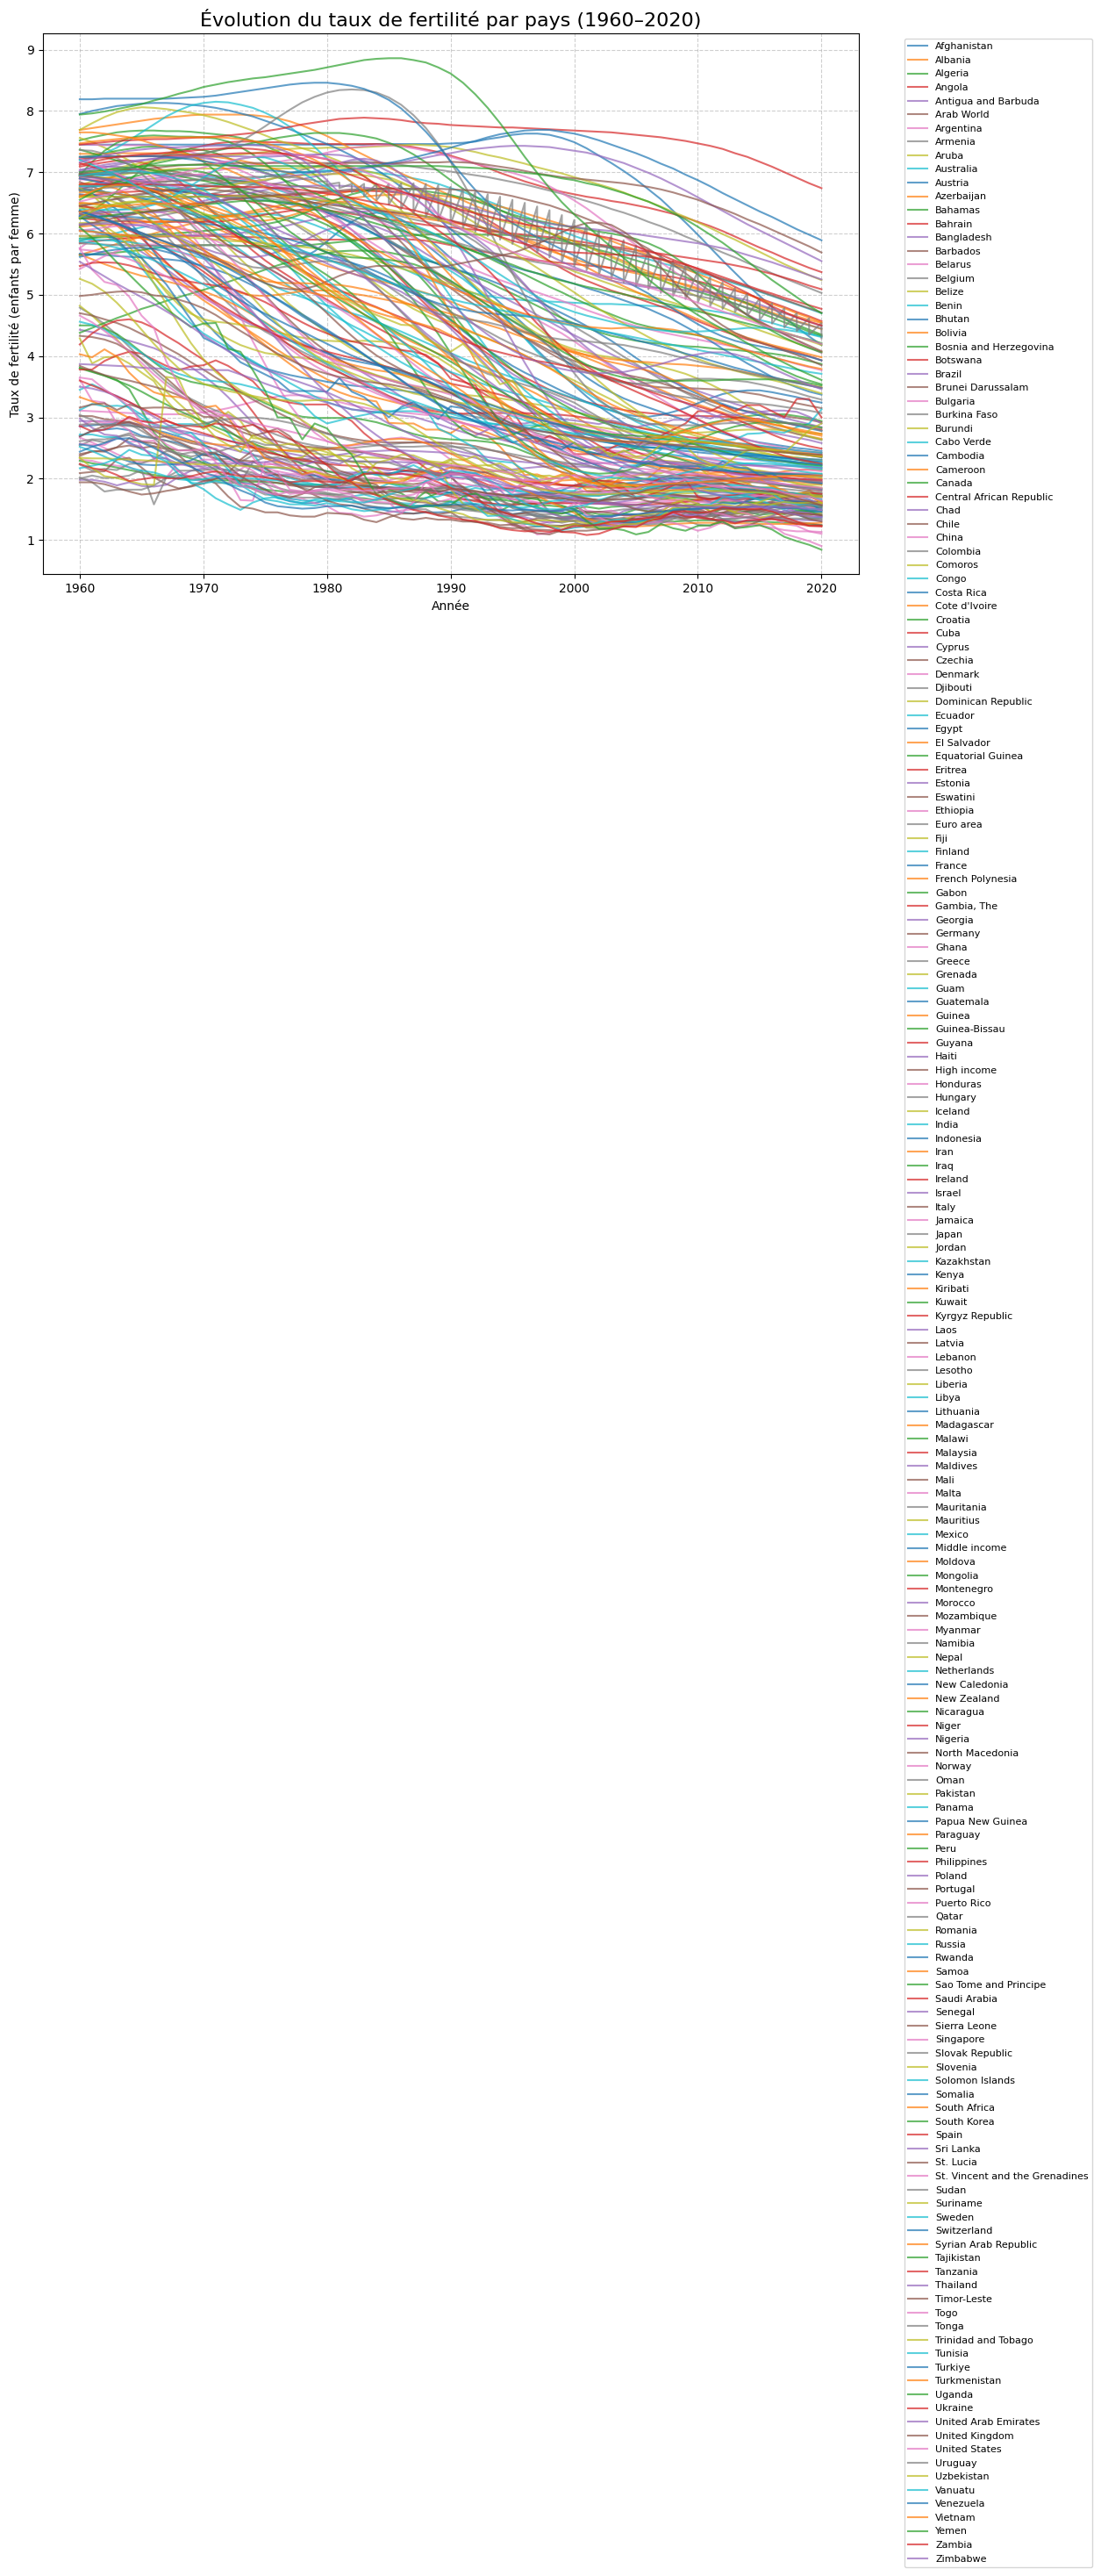

In [63]:
# ============================================================
#  Graphique multi-pays
# ============================================================
plt.figure(figsize=(12,8))

# Boucle sur chaque pays
for country, df_country in df_all.groupby(id_col):
    plt.plot(df_country["Year"], df_country["FertilityRate"], 
             label=country, alpha=0.7)

# Mise en forme
plt.title("Évolution du taux de fertilité par pays (1960–2020)", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<span style="background-color: #392fffff">→ Evolution du taux de fertilité en France</span>


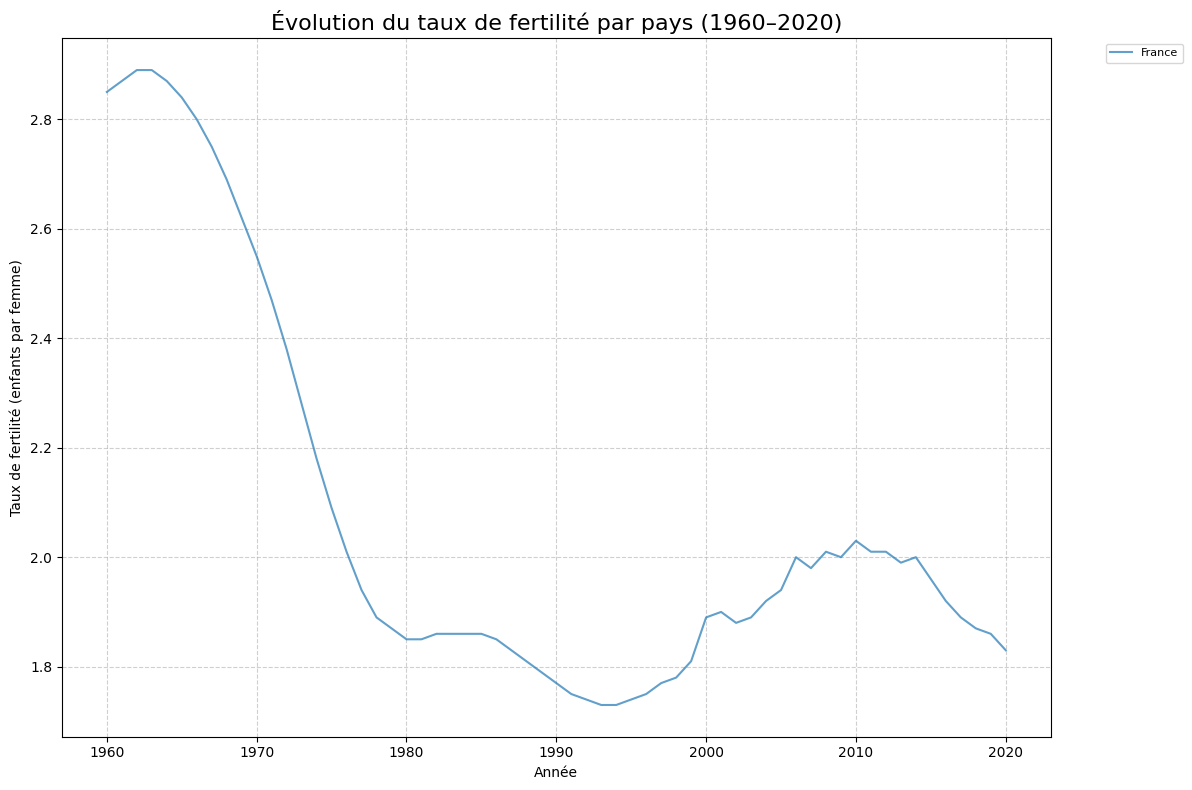

In [ ]:
# ============================================================
#  Graphique multi-pays
# ============================================================
plt.figure(figsize=(12,8))

# Boucle sur chaque pays
for country, df_country in df_france.groupby(id_col):
    plt.plot(df_country["Year"], df_france["FertilityRate"], 
             label=country, alpha=0.7)

# Mise en forme
plt.title("Évolution du taux de fertilité par pays (1960–2020)", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b>Objectif 1. Analyser l'évolution historique des taux de natalité (1960-2020)</b></h3>
</div>








<span style="background-color: #392fffff">→ Graphique : évolution du taux de fertilité moyen mondial (1960-2020)</span>


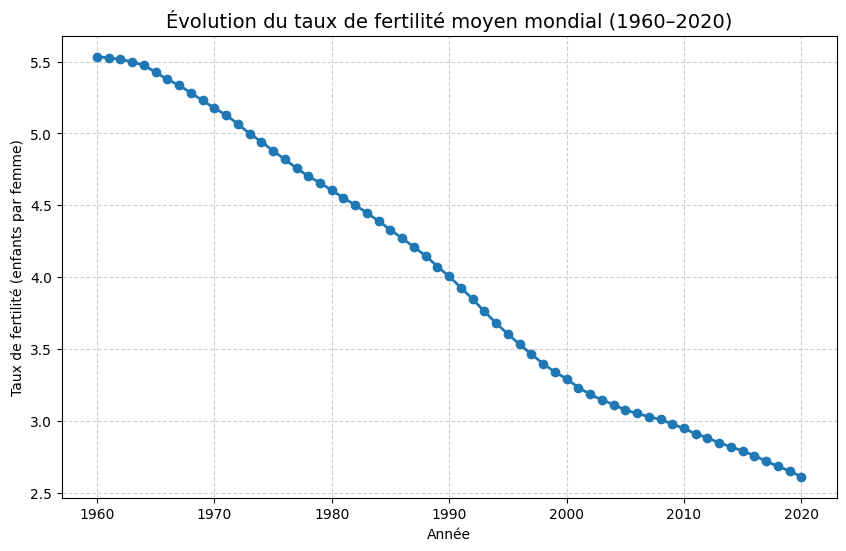

In [ ]:

# Graphique : évolution moyenne mondiale
world_mean = df_long.groupby("Year")["FertilityRate"].mean()

plt.figure(figsize=(10,6))
plt.plot(world_mean.index, world_mean.values, marker="o", color="tab:blue", linewidth=2)
plt.title("Évolution du taux de fertilité moyen mondial (1960–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



<span style="background-color: yellow; color: BLACK"><b>Remarque :</b></span>

Ce graphique illustre l’évolution du taux de fertilité moyen mondial par rapport aux années.

On observe une tendance générale à la baisse du taux de fertilité moyen mondial sur toute la période.

Dans les années 1960, le taux moyen se situait autour de 5 enfants par femme, ce qui reflète une natalité élevée dans la majorité des pays.

À partir des années 1970–1980, la courbe montre une diminution progressive et continue, liée à la transition démographique, à l’urbanisation, et à l’amélioration de l’accès à l’éducation et à la santé.

En 2020, le taux moyen mondial est descendu à environ 2,4 enfants par femme.

En conlusio : La natalité mondiale baisse de manière continue depuis 1960.

<span style="background-color: #392fffff">→ Graphique : évolution du taux de fertilité en France (1960-2020)</span>
 

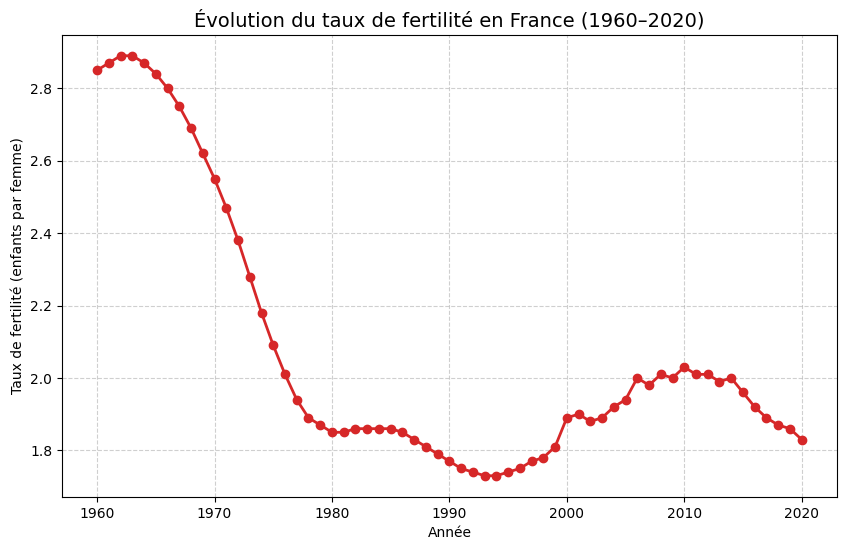

In [ ]:
#Graphique : évolution du taux de fertilité en France (1960-2020)
plt.figure(figsize=(10,6))
plt.plot(df_france["Year"], df_france["FertilityRate"], marker="o", color="tab:red", linewidth=2)
plt.title("Évolution du taux de fertilité en France (1960–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<span style="background-color: yellow; color: BLACK"><b>Remarque :</b></span>

Ce graphique illustre l’évolution du taux de fertilité en France par rapport aux années.

On observe une tendance générale à la baisse du taux de fertilité depuis 1960.

Dans les années 1960, le taux se situait autour de 2,7 enfants par femme, ce qui correspond à une natalité relativement élevée.

À partir des années 1970, la courbe montre une diminution progressive, liée à la transition démographique, à l’évolution des modes de vie, et à l’accès accru à la contraception et à l’éducation.

Dans les années 1990–2000, le taux se stabilise autour de 1,8 à 2 enfants par femme, reflétant une natalité modérée mais relativement stable par rapport à d’autres pays européens.

En 2020, le taux de fertilité en France est d’environ 1,8 enfant par femme.

En conclusion, la natalité en France baisse sur le long terme.

<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 2. Comparer différents modèles de régression pour prédire les tendances</b></h3>
</div>


<span style="background-color: #392fffff">→ **Méthode : Régression Linéaire Multiple**</span>


In [ ]:
from pathlib import Path
import subprocess
import sys
import pickle

from ProjetNatalite.config import MODELS_DIR

print("Lancement du script d'entraînement pour créer models/model.pkl...")
subprocess.run([sys.executable, "-m", "ProjetNatalite.modeling.train"], check=True)

model_path = MODELS_DIR / "model.pkl"
if model_path.exists():
    with open(model_path, "rb") as f:
        model = pickle.load(f)
    print(f"Modèle sauvegardé : {model_path}")
    print("Contenu du modèle chargé :", model)
else:
    print(f"Aucun fichier modèle trouvé à : {model_path}")


2025-11-17 14:43:03.977 | INFO     | ProjetNatalite.config:<module>:11 - PROJ_ROOT path is: C:\Users\anton\OneDrive\Bureau\ProjetNatalite


Lancement du script d'entraînement pour créer models/model.pkl...
Modèle sauvegardé : C:\Users\anton\OneDrive\Bureau\ProjetNatalite\models\model.pkl
Contenu du modèle chargé : {'name': 'dummy_model', 'version': 1}


<span style="background-color:#392fffff">→ **Méthode : Régression Linéaire Multiple par pays**</span>


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
#  Détection automatique des colonnes
# ============================================================
id_col = [c for c in data.columns if not c.isdigit()][0]   # colonne pays
year_cols = [c for c in data.columns if c.isdigit()]       # colonnes années

# Transformation en format long
df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

# ============================================================
#  Régression linéaire pour chaque pays
# ============================================================
results = []

for country, df_country in df_long.groupby(id_col):
    X = df_country[["Year"]].values
    y = df_country["FertilityRate"].values

    # Vérifier la taille du dataset
    if len(df_country) > 10:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    # Créer et entraîner le modèle
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    coef = model.coef_[0]
    intercept = model.intercept_
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Pays": country,
        "Coefficient": coef,
        "Intercept": intercept,
        "RMSE": rmse,
        "R2": r2
    })

# ============================================================
#  Résultats globaux
# ============================================================
df_results = pd.DataFrame(results)

print("\n Résumé du modèle de Régression Linéaire par pays :")
display(df_results.head(10))   # afficher les 10 premiers pays

# Filtrer uniquement les années 1960–2020
df_filtered = df_long[(df_long["Year"] >= 1960) & (df_long["Year"] <= 2020)]




 Résumé du modèle de Régression Linéaire par pays :


,Pays,Coefficient,Intercept,RMSE,R2
0,Afghanistan,-0.040922,88.387075,0.702546,0.539939
1,Albania,-0.081025,164.455280,0.401692,0.936664
2,Algeria,-0.112576,229.023627,0.785684,0.866409
3,Angola,-0.029365,65.298378,0.404114,0.591371
4,Antigua and Barbuda,-0.036239,74.643008,0.420307,0.744142
5,Arab World,-0.082088,168.515036,0.313606,0.955906
6,Argentina,-0.019066,40.767993,0.149129,0.834574
7,Armenia,-0.043172,88.378171,0.397312,0.815652
8,Aruba,-0.036301,74.646038,0.485202,0.688505
9,Australia,-0.023372,48.629148,0.283741,0.717473


<span style="background-color: #392fffff">→ **Visualisation du Méthode : Régression Linéaire Multiple**</span>



 Résumé du modèle de Régression Linéaire - France :


,Paramètre,Valeur,Interprétation réaliser par Steve et Lucas - M1 IBD
0,Coefficient (pente),-0.014006,Chaque année supplémentaire fait baisser le ta...
1,Intercept,29.939142,Valeur théorique du taux de fertilité si l'ann...
2,RMSE,0.248348,"Plus le RMSE est petit, plus les prédictions s..."
3,R²,0.546126,Proportion de la variation du taux de fertilit...


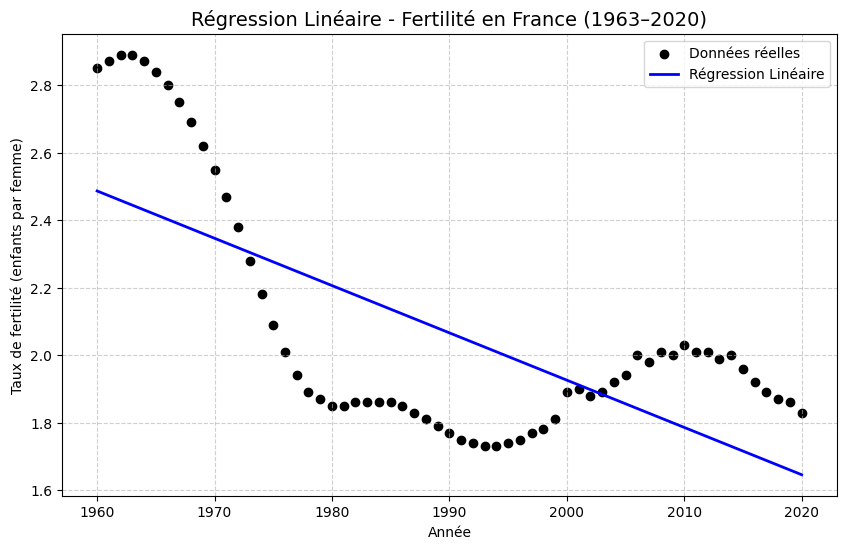

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
# Détection automatique de la colonne pays et transformation LONG
# ============================================================
id_col = [c for c in data.columns if not c.isdigit()][0]
year_cols = [c for c in data.columns if c.isdigit()]

df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

# Filtrer France (normalisation pour éviter espaces/majuscules)
df_france = df_long[df_long[id_col].str.strip().str.lower().str.contains("france")].dropna()

# Variables explicatives et cible
X = df_france[["Year"]].values
y = df_france["FertilityRate"].values

# Séparation train/test si assez de données
if len(df_france) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = X, X, y, y

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# ============================================================
# Résultats du modèle de Régression Linéaire
# ============================================================
coef = model.coef_[0]
intercept = model.intercept_
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Création d'un DataFrame pour affichage
df_model_results = pd.DataFrame({
    "Paramètre": ["Coefficient (pente)", "Intercept", "RMSE", "R²"],
    "Valeur": [coef, intercept, rmse, r2],
    "Interprétation réaliser par Steve et Lucas - M1 IBD ": [
        f"Chaque année supplémentaire fait baisser le taux de fertilité de {abs(coef):.4f} enfants/femme",
        "Valeur théorique du taux de fertilité si l'année = 0",
        "Plus le RMSE est petit, plus les prédictions sont proches des valeurs réelles",
        "Proportion de la variation du taux de fertilité expliquée par le modèle"
    ]
})

print("\n Résumé du modèle de Régression Linéaire - France :")
display(df_model_results)

# ============================================================
#  Visualisation
# ============================================================
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="black", label="Données réelles")
plt.plot(X, model.predict(X), color="blue", linewidth=2, label="Régression Linéaire")
plt.title("Régression Linéaire - Fertilité en France (1963–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



<span style="background-color: yellow; color: black"><b>**Remarque :**</b></span>

 Ce graphique s’intitule "Régression Linéaire - Fertilité en France (1963–2020)". Il représente l’évolution du taux de fertilité, c’est-à-dire le nombre moyen d’enfants par femme, en France entre 1963 et 2020.

L’axe horizontal indique les années, allant de 1963 à 2020. L’axe vertical montre le taux de fertilité, exprimé en enfants par femme.

Les points noirs correspondent aux données réelles observées chaque année. Ils montrent que le taux de fertilité était supérieur à 2.8 enfants par femme dans les années 1960, puis a diminué progressivement au fil du temps.

Une ligne bleue représente une régression linéaire, c’est-à-dire une tendance mathématique qui résume l’évolution globale du taux de fertilité. Cette ligne montre une baisse continue, atteignant un niveau inférieur à 1.8 enfants par femme en 2020.


<span style="background-color: #392fffff">→ **Random Forest Classification**</span>


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# --------------------------------
# 1) Exemple de dataset (simulé)
# --------------------------------
rng = np.random.RandomState(42)
n = 500
X = pd.DataFrame({
    "feature_1": rng.normal(loc=0, scale=1, size=n),
    "feature_2": rng.normal(loc=2, scale=1.5, size=n),
    "feature_3": rng.uniform(low=-1, high=1, size=n),
})
y = np.where(X["feature_1"] + 0.5 * X["feature_2"] > 2.0, "Classe_A",
    np.where(X["feature_2"] - X["feature_3"] < 1.0, "Classe_B", "Classe_C"))

# --------------------------------
# 2) Train / Test split
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Mise à l’échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# 3) Modèle Random Forest
# --------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)

# --------------------------------
# 4) Évaluation
# --------------------------------
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, digits=3, output_dict=True)
cv_scores = cross_val_score(rf, scaler.transform(X), y, cv=5, scoring="accuracy", n_jobs=-1)

# Résumé général
df_eval = pd.DataFrame({
    "Métrique": ["Accuracy (test)", "Cross-val mean (5-fold)", "Cross-val std (5-fold)"],
    "Valeur": [acc, cv_scores.mean(), cv_scores.std()]
})
print("\n Résultats Random Forest (Classification)")
display(df_eval)

# Classification report détaillé
df_report = pd.DataFrame(report_dict).transpose().reset_index()
df_report.rename(columns={"index": "Classe"}, inplace=True)
print("\n Classification report détaillé :")
display(df_report)

# Confusion matrix
df_cm = pd.DataFrame(cm, index=rf.classes_, columns=rf.classes_)
print("\n Confusion matrix :")
display(df_cm)

# Importance des variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
df_importances = importances.reset_index()
df_importances.columns = ["Variable", "Importance"]
print("\n Importance des variables :")
display(df_importances)

# Probabilités et prédictions (exemple 5 premières lignes)
proba_df = pd.DataFrame(y_proba, columns=rf.classes_)
proba_df["predicted"] = y_pred
proba_df["true"] = y_test
print("\n Exemple de probabilités par classe (vote des arbres) :")
display(proba_df.head(5))





 Résultats Random Forest (Classification)


,Métrique,Valeur
0,Accuracy (test),0.976000
1,Cross-val mean (5-fold),0.938000
2,Cross-val std (5-fold),0.024819



 Classification report détaillé :


,Classe,precision,recall,f1-score,support
0,Classe_A,0.956522,0.956522,0.956522,23.000
1,Classe_B,1.000000,0.933333,0.965517,30.000
2,Classe_C,0.972973,1.000000,0.986301,72.000
3,accuracy,0.976000,0.976000,0.976000,0.976
4,macro avg,0.976498,0.963285,0.969447,125.000
5,weighted avg,0.976432,0.976000,0.975834,125.000



 Confusion matrix :


,Classe_A,Classe_B,Classe_C
Classe_A,22,0,1
Classe_B,1,28,1
Classe_C,0,0,72



 Importance des variables :


,Variable,Importance
0,feature_2,0.503463
1,feature_1,0.307287
2,feature_3,0.189250



 Exemple de probabilités par classe (vote des arbres) :


,Classe_A,Classe_B,Classe_C,predicted,true
0,0.050000,0.126667,0.823333,Classe_C,Classe_C
1,0.040000,0.050000,0.910000,Classe_C,Classe_C
2,0.013333,0.830000,0.156667,Classe_B,Classe_B
3,0.943333,0.013333,0.043333,Classe_A,Classe_A
4,0.920000,0.003333,0.076667,Classe_A,Classe_A


<span style="background-color: #392fffff">→ **Matrice de Confusion -Random Forest**</span>



 Matrice de confusion (valeurs brutes) :


,Classe_A,Classe_B,Classe_C
Classe_A,22,0,1
Classe_B,1,28,1
Classe_C,0,0,72



 Rapport de classification détaillé :


,Classe,precision,recall,f1-score,support
0,Classe_A,0.956522,0.956522,0.956522,23.000
1,Classe_B,1.000000,0.933333,0.965517,30.000
2,Classe_C,0.972973,1.000000,0.986301,72.000
3,accuracy,0.976000,0.976000,0.976000,0.976
4,macro avg,0.976498,0.963285,0.969447,125.000
5,weighted avg,0.976432,0.976000,0.975834,125.000


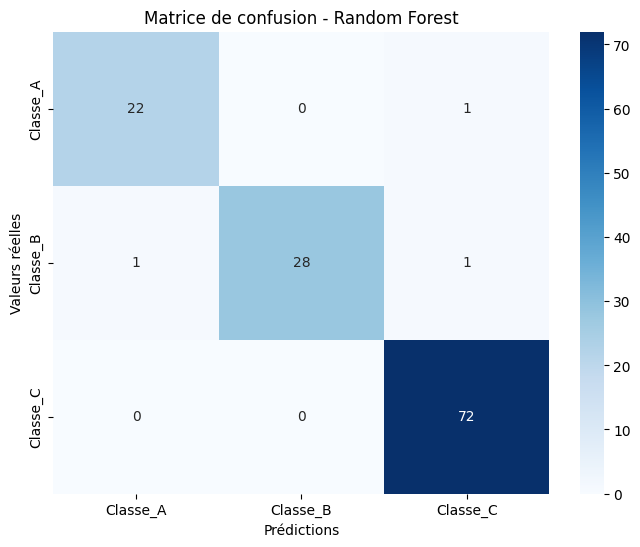

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ============================================================
# 1) Exemple de dataset
# ============================================================
rng = np.random.RandomState(42)
n = 500
X = pd.DataFrame({
    "feature_1": rng.normal(loc=0, scale=1, size=n),
    "feature_2": rng.normal(loc=2, scale=1.5, size=n),
    "feature_3": rng.uniform(low=-1, high=1, size=n),
})
y = np.where(X["feature_1"] + 0.5 * X["feature_2"] > 2.0, "Classe_A",
    np.where(X["feature_2"] - X["feature_3"] < 1.0, "Classe_B", "Classe_C"))

# ============================================================
# 2) Train/Test split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ============================================================
# 3) Random Forest Classifier
# ============================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ============================================================
# 4) Matrice de confusion et rapport de classification
# ============================================================
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
df_cm = pd.DataFrame(cm, index=rf.classes_, columns=rf.classes_)

print("\n Matrice de confusion (valeurs brutes) :")
display(df_cm)

report_dict = classification_report(y_test, y_pred, digits=3, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose().reset_index()
df_report.rename(columns={"index": "Classe"}, inplace=True)

print("\n Rapport de classification détaillé :")
display(df_report)

# ============================================================
# 5) Visualisation Heatmap
# ============================================================
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()



<span style="background-color: #392fffff">→ **Clustering Algorithme principal : K-Means (Non supervisé)**</span>


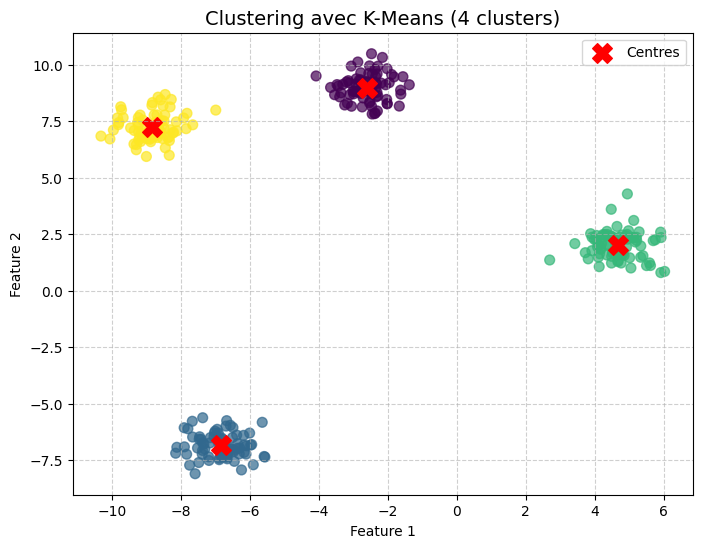

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# ============================================================
# 1) Génération d’un dataset d’exemple 
# ============================================================
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# ============================================================
# 2) Application  K-Means
# ============================================================
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Centres des clusters
centers = kmeans.cluster_centers_

# ============================================================
# 3) Visualisation
# ============================================================
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centres')
plt.title("Clustering avec K-Means (4 clusters)", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<span style="background-color: #392fffff">→ **Régression avec GradientBoostingRegressor**</span>


In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(
    loss="squared_error",      # perte pour régression
    learning_rate=0.05,        # ν
    n_estimators=600,          # plus d'arbres avec petit ν
    max_depth=3,               # interactions modestes
    subsample=0.8,             # stochastic GB
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.3344636979981024


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>
 La métrique choisie est MAE (Mean Absolute Error), qui mesure l’écart moyen entre prédictions et valeurs réelles.

<span style="background-color: #392fffff">→ **Classification avec GradientBoostingClassifier**</span>


In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(
    loss="log_loss",           # logistic loss
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbc.fit(X_train, y_train)
proba = gbc.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, proba))


ROC-AUC: 0.9868246271045387


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>
 un modèle qui prédit des classes binaires avec une probabilité.

Régression - MAE: 0.3344636979981024


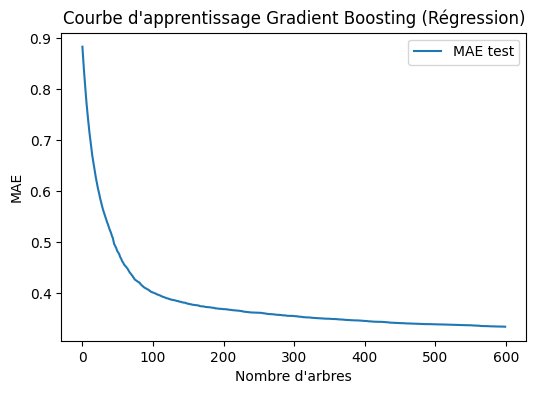

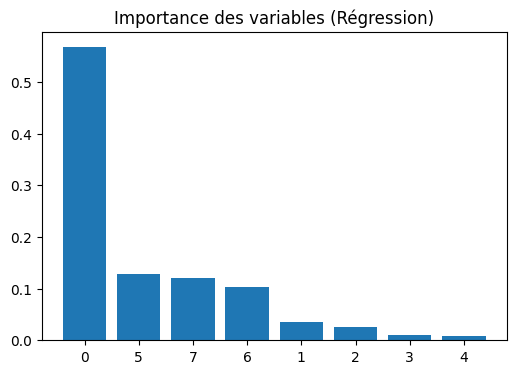

Classification - ROC-AUC: 0.9868246271045387


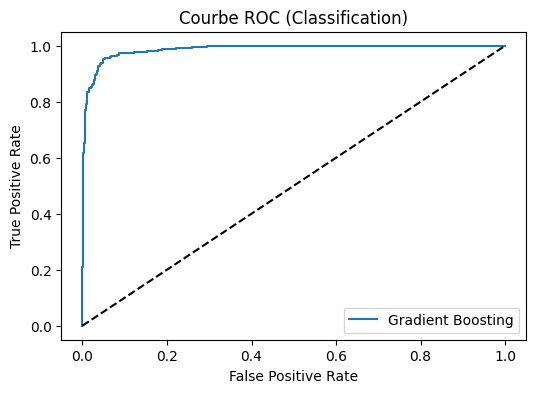

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# ============================
# 1. Régression : California Housing
# ============================

# Charger dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.05,
    n_estimators=600,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("Régression - MAE:", mean_absolute_error(y_test, y_pred))

# Courbe d’apprentissage (MAE vs nombre d’arbres)
test_score = gbr.staged_predict(X_test)
mae_scores = [mean_absolute_error(y_test, y_pred) for y_pred in test_score]

plt.figure(figsize=(6,4))
plt.plot(mae_scores, label="MAE test")
plt.xlabel("Nombre d'arbres")
plt.ylabel("MAE")
plt.title("Courbe d'apprentissage Gradient Boosting (Régression)")
plt.legend()
plt.show()


# Importance des variables
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), indices)
plt.title("Importance des variables (Régression)")
plt.show()


# ============================
# 2. Classification : Dataset synthétique
# ============================

# Générer dataset artificiel
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Gradient Boosting Classifier
gbc = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbc.fit(X_train, y_train)
proba = gbc.predict_proba(X_test)[:, 1]

print("Classification - ROC-AUC:", roc_auc_score(y_test, proba))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Gradient Boosting")
plt.plot([0,1], [0,1], 'k--')  # diagonale aléatoire
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC (Classification)")
plt.legend()
plt.show()


 <span style="background-color: yellow; color: black"><b>Remarque :</b></span>

→Courbe d’apprentissage (Régression) :Ce graphique montre comment l’erreur moyenne absolue (MAE) évolue au fur et à mesure que de nouveaux arbres sont ajoutés. Une courbe qui descend rapidement puis se stabilise indique que le modèle apprend efficacement sans trop sur‑adapter.

 →Importance des variables (Régression) : Ce graphique illustre quelles variables du dataset influencent le plus les prédictions du modèle. Les barres les plus hautes correspondent aux features les plus déterminantes dans l’explication des prix des maisons.

 → Courbe ROC (Classification) :La courbe ROC compare le taux de vrais positifs au taux de faux positifs pour différents seuils de décision. Plus la courbe s’approche du coin supérieur gauche, meilleure est la capacité du modèle à distinguer les deux classes. La diagonale en pointillés représente un modèle aléatoire.


<span style="background-color: #392fffff">→ **Decision Tree Regressor**</span>


MAE: 0.5222592972077786


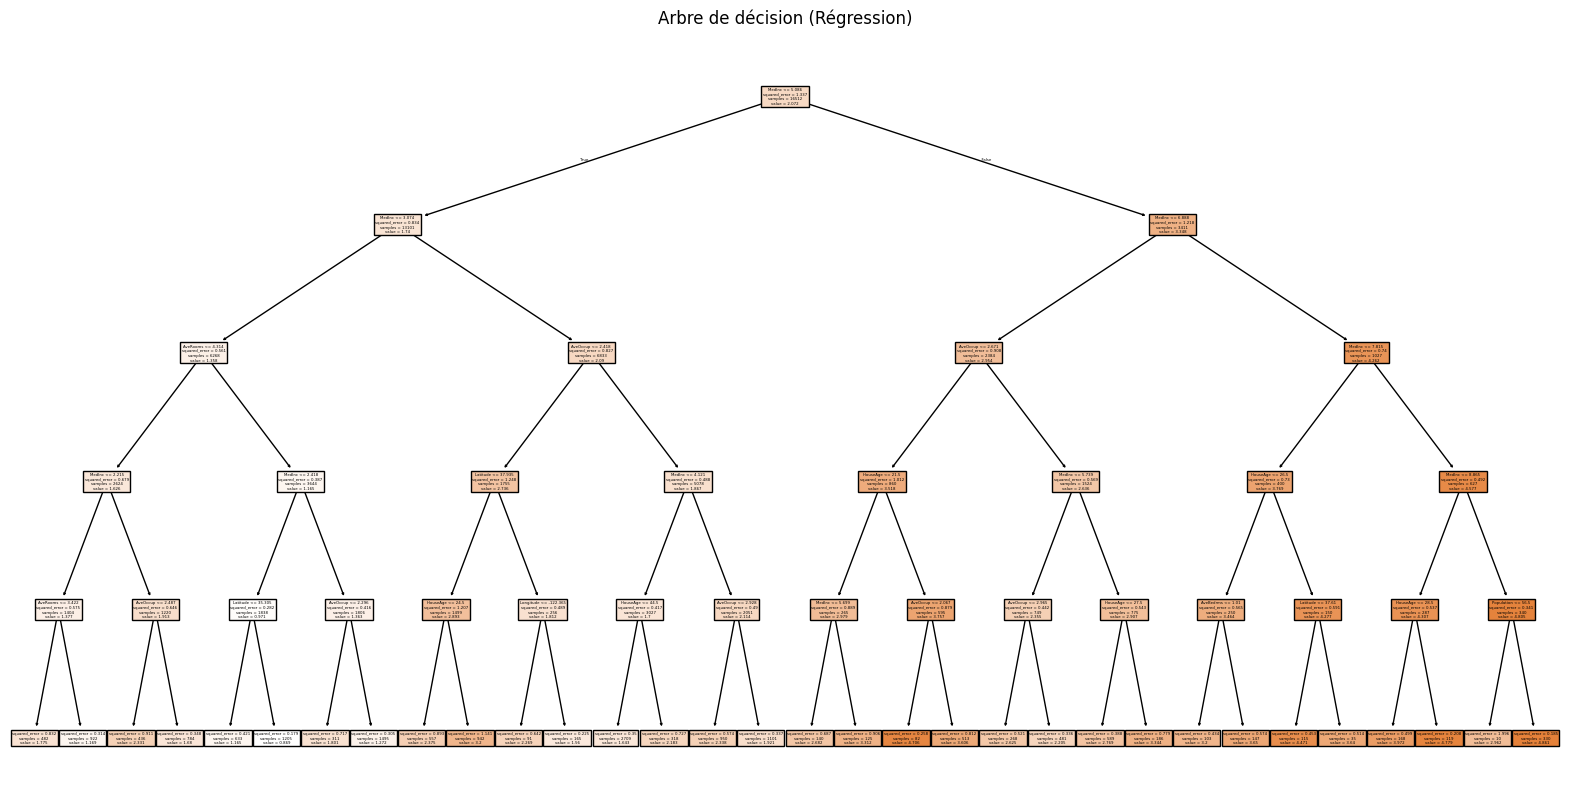

In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

# ============================
# 1. Charger le dataset
# ============================
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 2. Créer et entraîner le modèle
# ============================
dtr = DecisionTreeRegressor(
    criterion="squared_error",  # fonction de perte
    max_depth=5,                # profondeur max de l'arbre
    min_samples_leaf=10,        # au moins 10 échantillons par feuille
    random_state=42
)
dtr.fit(X_train, y_train)

# ============================
# 3. Évaluer le modèle
# ============================
y_pred = dtr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


# ============================
# 4. Visualiser l'arbre
# ============================
plt.figure(figsize=(20,10))
plot_tree(dtr, filled=True, feature_names=fetch_california_housing().feature_names)
plt.title("Arbre de décision (Régression)")
plt.show()


<span style="background-color: #392fffff">→ **Ridge Regression (L2) et Lasso Regression (L1)**</span>


Ridge MAE: 0.5332039182571576


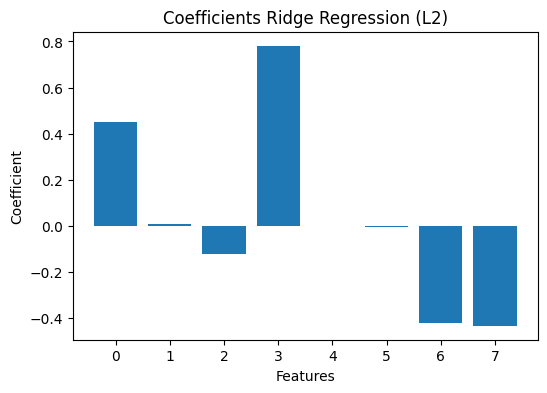

Lasso MAE: 0.5362504645663364


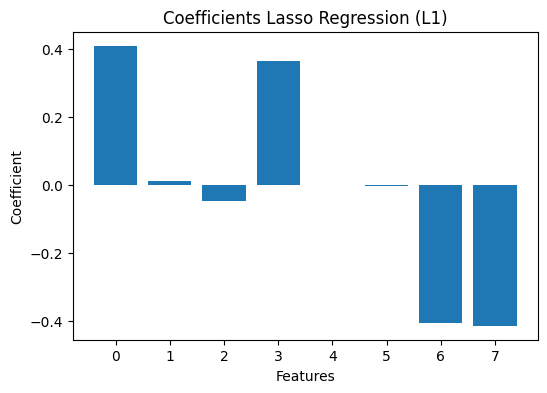

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error

# Charger dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 1. Ridge Regression (L2)
# ============================
ridge = Ridge(alpha=1.0)  # alpha = intensité de la régularisation
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))

plt.figure(figsize=(6,4))
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.title("Coefficients Ridge Regression (L2)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()

# ============================
# 2. Lasso Regression (L1)
# ============================
lasso = Lasso(alpha=0.01)  # alpha plus petit car L1 est plus agressif
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))

plt.figure(figsize=(6,4))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.title("Coefficients Lasso Regression (L1)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 3. Segmenter les pays en groupes selon leurs profils démographiques</b></h3>
</div>


<span style="background-color: #392fffff">→ **Diviser les pays selon leur profils démographiques**</span>


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger ton fichier (ex: fertitily_rate.csv)
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Choisir les colonnes numériques pertinentes
features = ["fertility_rate", "mortality_rate", "life_expectancy", "urbanization"]
X = df[["2020"]] ##Année 2020


# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df[["Country", "Cluster"]])



         Country  Cluster
0         _World        0
1    Afghanistan        1
2        Albania        2
3        Algeria        0
4         Angola        1
..           ...      ...
182    Venezuela        0
183      Vietnam        2
184        Yemen        0
185       Zambia        1
186     Zimbabwe        0

[187 rows x 2 columns]


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>

→Cluster 0 : pays avec un certain niveau de fécondité (par exemple, faible).

→Cluster 1 : pays avec un autre niveau (par exemple, moyen).

→Cluster 2 : pays avec un autre niveau encore (par exemple, élevé).

<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 4. Générer des prédictions pour la décennie 2021-2030</b></h3>
</div>


<span style="background-color: #392fffff">→ **Prévisions du taux de fécondité pour la France**</span>


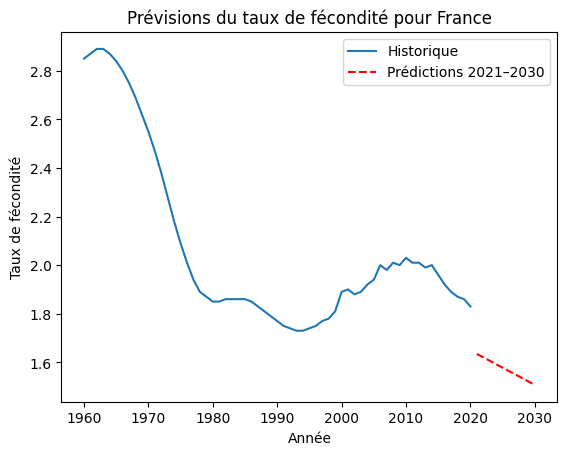

   Year  Predicted Fertility Rate
0  2021                  1.634475
1  2022                  1.620305
2  2023                  1.606134
3  2024                  1.591963
4  2025                  1.577792
5  2026                  1.563621
6  2027                  1.549451
7  2028                  1.535280
8  2029                  1.521109
9  2030                  1.506938


In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger ton fichier
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Choisir un pays (ex: France)
country = "France"
y = df[df["Country"] == country].drop("Country", axis=1).values.flatten()
years = np.arange(1960, 2021).reshape(-1, 1)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(years, y)

# Prédictions pour 2021–2030
future_years = np.arange(2021, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

# Affichage
plt.plot(years, y, label="Historique")
plt.plot(future_years, future_preds, "r--", label="Prédictions 2021–2030")
plt.xlabel("Année")
plt.ylabel("Taux de fécondité")
plt.title(f"Prévisions du taux de fécondité pour {country}")
plt.legend()
plt.show()

# Résultats numériques
pred_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted Fertility Rate": future_preds})
print(pred_df)


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>

Le graphique montre l’évolution du taux de fécondité en France entre 1960 et 2020. On observe une baisse régulière : dans les années 1960, les femmes avaient en moyenne près de cinq enfants, tandis qu’en 2020 ce chiffre est tombé autour de deux enfants et demi. Cette tendance traduit la transition démographique mondiale, liée à l’urbanisation, à l’éducation et à l’accès à la contraception.

La courbe rouge en pointillés représente les prédictions pour la décennie 2021–2030. Elle prolonge la tendance historique et indique que le taux de fécondité en France devrait continuer à diminuer légèrement. D’ici 2030, le monde se rapprocherait du seuil de deux enfants par femme, qui correspond au renouvellement de la population.

En résumé, le graphique illustre une baisse historique de la fécondité et projette une poursuite de cette baisse dans les années à venir, avec un monde qui converge vers un niveau bas et stable.

<span style="background-color: #392fffff">→ **Prévisions du taux de fécondité mondial (2021–2030)**</span>


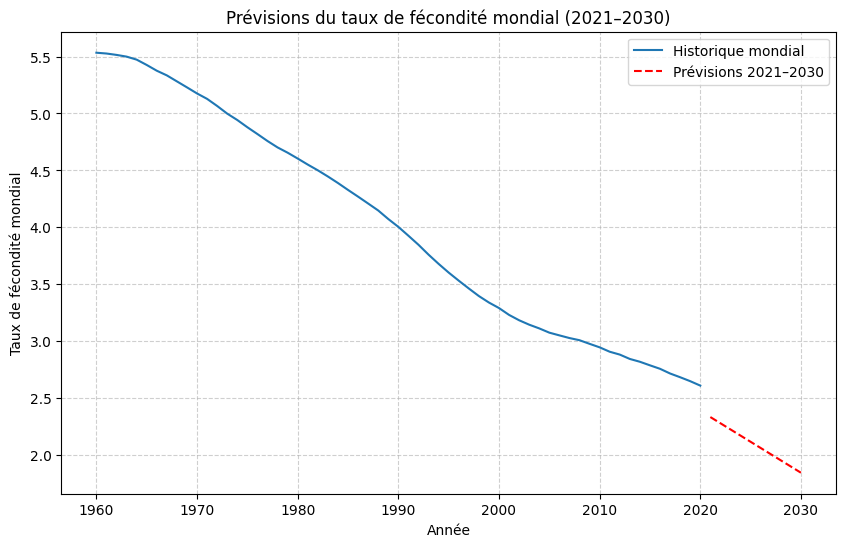


 Prévisions du taux de fécondité mondial (2021–2030) :


,Année,Taux de fécondité prédit
0,2021,2.334691
1,2022,2.280378
2,2023,2.226065
3,2024,2.171751
4,2025,2.117438
5,2026,2.063125
6,2027,2.008811
7,2028,1.954498
8,2029,1.900185
9,2030,1.845872


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display  # pour afficher les DataFrames proprement

# Charger le fichier
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Calculer la moyenne mondiale par année (1960–2020)
years = df.columns[1:]  # toutes les colonnes sauf "Country"
world_series = df[years].mean()

# Préparer les données
X = np.array(years.astype(int)).reshape(-1, 1)
y = world_series.values

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions pour 2021–2030
future_years = np.arange(2021, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

# ============================================================
#  Visualisation historique + prévisions
# ============================================================
plt.figure(figsize=(10,6))
plt.plot(X, y, label="Historique mondial")
plt.plot(future_years, future_preds, "r--", label="Prévisions 2021–2030")
plt.xlabel("Année")
plt.ylabel("Taux de fécondité mondial")
plt.title("Prévisions du taux de fécondité mondial (2021–2030)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ============================================================
#  Résultats numériques des prévisions
# ============================================================
pred_df = pd.DataFrame({
    "Année": future_years.flatten(),
    "Taux de fécondité prédit": future_preds
})

print("\n Prévisions du taux de fécondité mondial (2021–2030) :")
display(pred_df)


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>


Le graphique montre l’évolution du taux de fécondité mondial entre 1960 et 2020. On observe une baisse régulière : dans les années 1960, les femmes avaient en moyenne près de cinq enfants, tandis qu’en 2020 ce chiffre est tombé autour de deux enfants et demi. Cette tendance traduit la transition démographique mondiale, liée à l’urbanisation, à l’éducation et à l’accès à la contraception.

La courbe rouge en pointillés représente les prédictions pour la décennie 2021–2030. Elle prolonge la tendance historique et indique que le taux de fécondité mondial devrait continuer à diminuer légèrement. D’ici 2030, le monde se rapprocherait du seuil de deux enfants par femme, qui correspond au renouvellement de la population.

En résumé, le graphique illustre une baisse historique de la fécondité et projette une poursuite de cette baisse dans les années à venir, avec un monde qui converge vers un niveau bas et stable.

-------------------------------------------------------------------------------------------------------------------------------------------